In [1]:
%reload_ext mocodo

Mocodo 3.2.1 loaded.


In [2]:
from IPython import display
from pathlib import Path

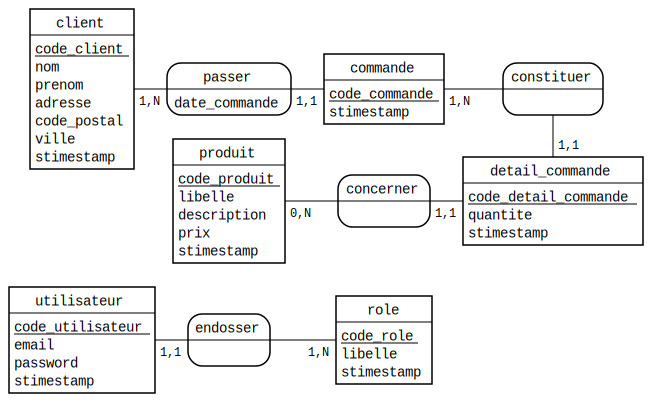

In [24]:
%%mocodo --mld --title=mspr --relations mysql
client: code_client [int(11)], nom [varchar(50)], prenom [varchar(50)], adresse [varchar(250)], code_postal [int(5)], ville [VARCHAR(50)], stimestamp [TIMESTAMP DEFAULT CURRENT_DATE()]
passer, 1N client, 11 commande:date_commande [DATE()]
commande: code_commande [int(11)], stimestamp [TIMESTAMP DEFAULT CURRENT_DATE()]
constituer, 11 detail_commande, 1N commande

:
produit: code_produit [int(11)], libelle [varchar(50)],  description [text], prix [int(11)], stimestamp [TIMESTAMP DEFAULT CURRENT_DATE()]
concerner, 0N produit, 11 detail_commande
detail_commande: code_detail_commande [int(11)], quantite [int(6)], stimestamp [TIMESTAMP DEFAULT CURRENT_DATE()]

utilisateur: code_utilisateur [int(11)], email [varchar(50)], password [varchar(50)], stimestamp [TIMESTAMP DEFAULT CURRENT_DATE()]
endosser, 11 utilisateur, 1N role
role: code_role [int(11)], libelle [varchar(50)], stimestamp [TIMESTAMP DEFAULT CURRENT_DATE()]




In [25]:
display.Code(filename="mocodo_notebook/sandbox_mysql.sql", language="mysql")

CREATE DATABASE IF NOT EXISTS `MSPR` DEFAULT CHARACTER SET UTF8MB4 COLLATE utf8_general_ci;
USE `MSPR`;

CREATE TABLE `CLIENT` (
  `code_client` int(11),
  `nom` varchar(50),
  `prenom` varchar(50),
  `adresse` varchar(250),
  `code_postal` int(5),
  `ville` VARCHAR(50),
  `stimestamp` TIMESTAMP DEFAULT CURRENT_DATE(),
  PRIMARY KEY (`code_client`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `COMMANDE` (
  `code_commande` int(11),
  `stimestamp` TIMESTAMP DEFAULT CURRENT_DATE(),
  `code_client` int(11),
  `date_commande` DATE(),
  PRIMARY KEY (`code_commande`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `DETAIL_COMMANDE` (
  `code_detail_commande` int(11),
  `quantite` int(6),
  `stimestamp` TIMESTAMP DEFAULT CURRENT_DATE(),
  `code_commande` int(11),
  `code_produit` int(11),
  PRIMARY KEY (`code_detail_commande`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `PRODUIT` (
  `code_produit` int(11),
  `libelle` varchar(50),
  `description` text,
  `prix` int(11),
  `stimestamp` TIMESTAMP DEFAULT CURRENT_DATE(),
  PRIMARY KEY (`code_produit`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `ROLE` (
  `code_role` int(11),
  `libelle` varchar(50),
  `stimestamp` TIMESTAMP DEFAULT CURRENT_DATE(),
  PRIMARY KEY (`code_role`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `UTILISATEUR` (
  `code_utilisateur` int(11),
  `email` varchar(50),
  `password` varchar(50),
  `stimestamp` TIMESTAMP DEFAULT CURRENT_DATE(),
  `code_role` int(11),
  PRIMARY KEY (`code_utilisateur`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

ALTER TABLE `COMMANDE` ADD FOREIGN KEY (`code_client`) REFERENCES `CLIENT` (`code_client`);
ALTER TABLE `DETAIL_COMMANDE` ADD FOREIGN KEY (`code_produit`) REFERENCES `PRODUIT` (`code_produit`);
ALTER TABLE `DETAIL_COMMANDE` ADD FOREIGN KEY (`code_commande`) REFERENCES `COMMANDE` (`code_commande`);
ALTER TABLE `UTILISATEUR` ADD FOREIGN KEY (`code_role`) REFERENCES `ROLE` (`code_role`);